In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [16]:
df = pd.read_csv('../DATA/B-3/data.csv')

In [17]:
offset, output = df['offset[%]'], df['output[mV]']

(0.0, 800.0)

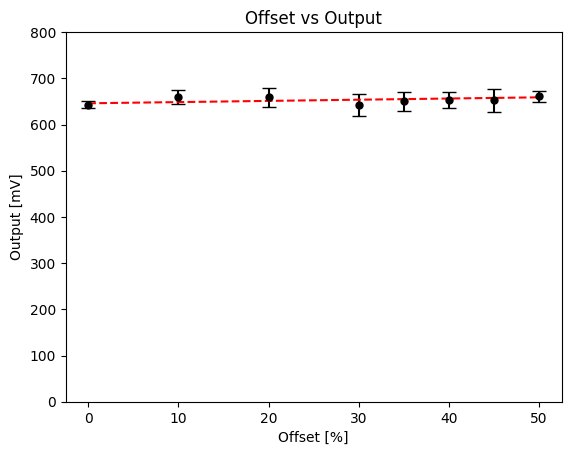

In [23]:
x = offset.unique()
y = np.zeros((len(x), 2))
for i in range(len(x)):
  y[i] = output[offset == x[i]].agg(["mean", "std"])

func = lambda x, a, b: a * x + b

popt, pcov = scipy.optimize.curve_fit(func, x, y[:, 0], sigma=y[:, 1])

plt.errorbar(x, y[:, 0], yerr=y[:, 1], fmt='o', ms=5, 
              color='black', capsize=5, capthick=1, label='Data')
plt.plot(x, func(x, *popt), 'r--', label='Best Fit')
plt.xlabel('Offset [%]')
plt.ylabel('Output [mV]')
plt.title('Offset vs Output')
plt.ylim(0, 800)